# Physical oceanography and current meter data from mooring HG-N-FEVI-33 at Hausgarten North

> **Data citation:**
> *Salter, Ian; Bauerfeind, Eduard; Nöthig, Eva-Maria; von Appen, Wilken-Jon; Lochthofen, Normen; Soltwedel, Thomas; Schewe, Ingo (2018): Physical oceanography and current meter data from mooring HG-N-FEVI-33 at Hausgarten North. Alfred Wegener Institute, Helmholtz Center for Polar and Marine Research, Bremerhaven, PANGAEA, https://doi.pangaea.de/10.1594*/PANGAEA.884546 

In this example, the data is automatically downloaded from Pangaea using the *pangaear* library (see https://github.com/ropensci/pangaear for more information). 

If necessary, you can install it as follows:

> install.packages("pangaear")

In [1]:
library("pangaear")
library("lubridate")
library("ggplot2")


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Load data

The dataset can be loaded using the *pg_data* function.

In [2]:
dataset=pg_data(doi = '10.1594/PANGAEA.884546')

Processing 1 files


### A first look on the dataset

In [3]:
dataset

[[1]]
<Pangaea data> 10.1594/PANGAEA.884546
  parent doi: 10.1594/PANGAEA.884546
  url:        https://doi.org/10.1594/PANGAEA.884546
  citation:   NA
  path:       /home/edvs1/spinkern/.cache/pangaear/10_1594_PANGAEA_884546.txt
  data:
# A tibble: 38,280 x 11
   `Date/Time` `Gear ID` `Depth water [m… `Press [dbar]` `Temp [°C]`   Sal
   <chr>           <int>            <dbl>          <dbl>       <dbl> <dbl>
 1 2016-07-05…         2             321.           324.       3.05     NA
 2 2016-07-05…         3            2420.          2460.      -0.743    NA
 3 2016-07-05…         4            2584.          2628.      -0.743    NA
 4 2016-07-05…         2             323.           326.       3.09     NA
 5 2016-07-05…         3            2420.          2460.      -0.743    NA
 6 2016-07-05…         4            2585.          2628.      -0.742    NA
 7 2016-07-05…         2             323            327.       3.10     NA
 8 2016-07-05…         3            2420.          2460.      -0

*dataset* contains nested lists.
The first element of *dataset* can be accessed wih *dataset[[1]]*, and contains 6 elements. 

Show these element names:

In [4]:
names(dataset[[1]])

[1] "parent_doi" "doi"        "citation"   "url"        "path"      
[6] "data"

Show the content of such a nested list:

In [5]:
dataset[[1]]$parent_doi

[1] "10.1594/PANGAEA.884546"

### Take the data

Transfer the data to a data frame:

In [6]:
data<-as.data.frame(dataset[[1]]$data)

head(data)

Date/Time,Gear ID,Depth water [m],Press [dbar],Temp [°C],Sal,CV hor [cm/s],DIR [deg],UC [cm/s],VC [cm/s],O2 [µmol/l]
2016-07-05T08:00,2,320.8,324.4,3.050,NA,14.10,242.4,-12.49,-6.54,NA
2016-07-05T08:00,3,2419.5,2459.7,-0.743,NA,13.20,258.5,-12.93,-2.63,NA
2016-07-05T08:00,4,2584.4,2628.4,-0.743,NA,12.29,236.8,-10.28,-6.72,NA
2016-07-05T09:00,2,322.7,326.4,3.093,NA,16.76,235.9,-13.87,-9.41,NA
2016-07-05T09:00,3,2419.5,2459.7,-0.743,NA,12.03,237.1,-10.09,-6.54,NA
2016-07-05T09:00,4,2584.6,2628.5,-0.742,NA,12.62,225.0,-8.92,-8.93,NA


and fix names, gearId, etc. for easy data handling...

In [7]:
orig<-names(data)
orig
names(data)<-c('date','gearId','depth','press','temp','sal','cv','dir','uc','vc','o2')

data$gearId<-as.factor(data$gearId)

summary(data)

[1] "Date/Time"       "Gear ID"         "Depth water [m]" "Press [dbar]"   
 [5] "Temp [°C]"       "Sal"             "CV hor [cm/s]"   "DIR [deg]"      
 [9] "UC [cm/s]"       "VC [cm/s]"       "O2 [µmol/l]"

     date           gearId       depth            press             temp       
 Length:38280       1:9558   Min.   : 156.2   Min.   : 157.9   Min.   :-0.752  
 Class :character   2:9574   1st Qu.: 315.8   1st Qu.: 319.4   1st Qu.:-0.735  
 Mode  :character   3:9574   Median :2419.5   Median :2459.7   Median :-0.723  
                    4:9574   Mean   :1381.3   Mean   :1403.9   Mean   : 1.310  
                             3rd Qu.:2584.0   3rd Qu.:2627.9   3rd Qu.: 3.367  
                             Max.   :2586.8   Max.   :2630.8   Max.   : 5.770  
                                                                               
      sal              cv             dir              uc         
 Min.   :34.71   Min.   : 0.11   Min.   :  0.0   Min.   :-40.810  
 1st Qu.:35.04   1st Qu.: 7.04   1st Qu.:239.8   1st Qu.:-11.970  
 Median :35.07   Median :10.85   Median :275.9   Median : -7.240  
 Mean   :35.06   Mean   :12.36   Mean   :250.2   Mean   : -7.154  
 3rd Qu.:35.09   3rd Qu.:

## Plots

Depth and temperature profile over the time for gearId 1 and 2

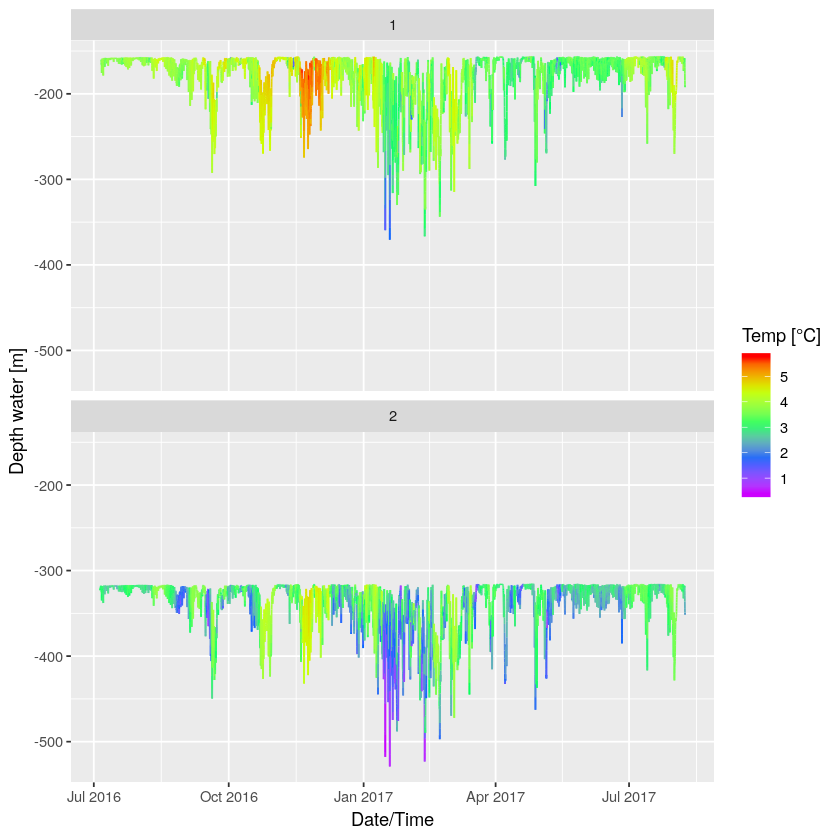

In [8]:
ggplot(data=data[data$gearId==1 | data$gearId==2 ,])+
    geom_line(mapping = aes(x=ymd_hm(date),y=-depth,color=temp)) +
    scale_color_gradientn(colors = rev(rainbow(5)), name = orig[5])+
    #geom_smooth(mapping = aes(x=ymd_hm(date),y=-depth)) +
    xlab(orig[1]) + 
    ylab(orig[3]) +
    facet_wrap(~gearId, nrow=2)